In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

## Load model

In [2]:
model_handle = 'https://tfhub.dev/google/vila/image/1'
model = hub.load(model_handle)
predict_fn = model.signatures['serving_default']

## Utility functions

In [3]:
def load_image_from_url(img_url):
  """Returns an image with shape [1, height, width, num_channels]."""
  user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
  response = requests.get(img_url, headers=user_agent)
  image_bytes = BytesIO(response.content)
  image = Image.open(image_bytes)
  return image, response.content

def show_image(image, title=''):
  image_size = image.size
  plt.imshow(image)
  plt.axis('on')
  plt.title(title)
  plt.show()

## Load image

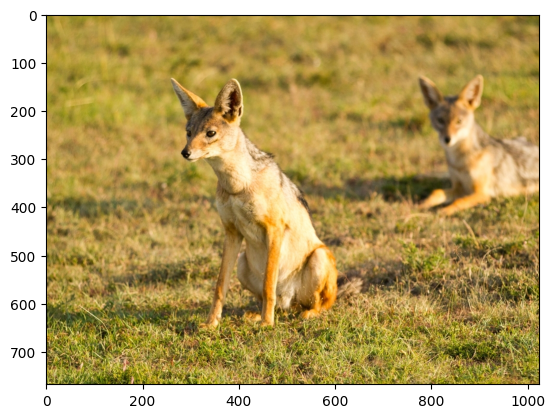

In [4]:

image_url = 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgr0DKaAoO6qTrJo3hXP8UM3D4AB8gQeNI22Q2QphBVGgn-5v84tjhH3ZWTlGtlUoPdlcx54dM93Qi04MuN7eBbj9WlT8Qxy6B2Us4kcn_53FH28MnTtGCzMPhjCVGIgXRL8ZEMeO-7iue7sNEGxBtgx2bI-eKDQAondM8Dfjb1FaybFgUQji4UU9-0vQ/s1024/image9.png' #@param {type: 'string'}

image, image_bytes = load_image_from_url(image_url)

show_image(image)

## Get predicted MOS Score

In [10]:
with tf.device('/gpu:0'):
  prediction = predict_fn(tf.constant(image_bytes))
  print("predicted MOS in [0, 1]: ", float(prediction['predictions'][0][0]))

predicted MOS in [0, 1]:  0.5276569724082947
